# Setup

In [ ]:
!pip install -qU gradio transformers diffusers accelerate safetensors

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 30.6 MB/s eta 0:00:00


This command uses `pip`, the Python package installer, to install or upgrade several specific libraries.

The command is broken down as follows:
* The `!` at the beginning executes the line as a shell command within a notebook environment like Jupyter or Google Colab.
* `pip install` is the core command to install Python packages.
* The `-q` flag stands for "quiet," which reduces the amount of text output during the installation process.
* The `-U` flag stands for "upgrade," which instructs `pip` to update the packages to their newest available versions if they are already installed.

The packages being installed are:
* `gradio`: A library used to create and share web-based user interfaces for machine learning models.
* `transformers`: A library from Hugging Face that provides access to a wide range of pre-trained models for tasks like text, image, and audio processing.
* `diffusers`: A library from Hugging Face specifically for working with diffusion models, which are used for generating content like images from text prompts.
* `accelerate`: A library from Hugging Face designed to simplify running code on various hardware setups, such as systems with multiple GPUs or TPUs.
* `safetensors`: A library that provides a secure and fast file format for saving and loading large numerical data, often used for machine learning model weights.

In [ ]:
import torch
from diffusers import FluxPipeline
from random import sample
import os
import itertools
from IPython.display import Image

This script imports several Python libraries and modules to set up an environment for tasks related to machine learning and image generation.

* `import torch` loads the PyTorch library, which is a foundational framework for deep learning. It provides tools for creating and training neural networks and performs numerical operations efficiently using data structures called tensors.

* `from diffusers import FluxPipeline` imports the `FluxPipeline` class from the `diffusers` library by Hugging Face. This library offers pre-trained models and tools for image generation. A `FluxPipeline` is a high-level interface designed to simplify the process of generating images from text prompts using the FLUX model architecture.

* `from random import sample` imports the `sample` function from Python's built-in `random` module. This function is used to select a specific number of unique items from a list or sequence, which is useful for tasks requiring random selection.

* `import os` loads the `os` module, which allows the program to interact with the operating system. Its functions are typically used for file management, such as creating directories, checking for file existence, and constructing file paths for saving or loading data like generated images.

* `import itertools` loads the `itertools` module. This module provides functions for creating and manipulating iterators, which are used to produce sequences of data. It is often used for creating complex combinations or permutations, for instance, to systematically generate a variety of text prompts from a set of keywords.

* `from IPython.display import Image` imports the `Image` class, which is used within interactive environments like Jupyter Notebooks. This class allows for the direct display of images in the output of a code cell, making it convenient to view visual results.

In [ ]:
class CFG:
    model = "black-forest-labs/FLUX.1-dev"
    device = 'cuda'
    dtype = torch.bfloat16
    variant = "fp16"
    howmany = 1 # nof images per prompt
    seed = 42
    infsteps = 30

os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"

This code defines a set of configuration parameters and sets an environment variable to optimize model downloads. The `CFG` class serves as a container for all the settings that will be used to run the image generation model. This practice groups all configurable parameters in one place for easy access and modification.

* `model = "black-forest-labs/FLUX.1-dev"`: This line sets the identifier for the pre-trained model to be downloaded from the Hugging Face Hub. The string specifies the `FLUX.1-dev` model from the `black-forest-labs` repository. The "dev" suffix indicates this is a development version of the model.

* `device = 'cuda'`: This parameter specifies that the model should run on an NVIDIA GPU, using the CUDA platform for accelerated computation.

* `dtype = torch.bfloat16`: This sets the numerical precision for the model's calculations to `bfloat16`. This 16-bit floating-point format reduces memory usage and can speed up computations on compatible hardware compared to the standard 32-bit format.

* `variant = "fp16"`: This specifies that the `fp16` (16-bit floating-point) version of the model weights should be used. This is consistent with the `dtype` setting and helps reduce the model's disk and memory footprint.

* `howmany = 1`: This custom parameter determines the number of images to be generated for each input prompt. Here, it is set to create one image.

* `seed = 42`: This sets the seed for random number generation. Using a fixed seed ensures that the image generation process, which involves random noise, is deterministic and can be reproduced exactly.

* `infsteps = 30`: This value defines the number of inference steps the diffusion model will perform to generate an image. The number of steps affects the trade-off between image quality and generation speed.

The line `os.environ["HF_HUB_ENABLE_HF_TRANSFER"] = "1"` configures an environment variable for the Hugging Face library. By setting `HF_HUB_ENABLE_HF_TRANSFER` to `"1"`, it enables a high-performance file transfer client, which significantly accelerates the process of downloading large model files from the Hugging Face Hub.

In [ ]:
# fix randomness
g = torch.Generator(device = CFG.device).manual_seed(CFG.seed)

This line of code creates and configures a random number generator to ensure that any stochastic processes in the program are reproducible.


The expression `torch.Generator(device = CFG.device)` instantiates a `Generator` object from the PyTorch library. This object manages the generation of random numbers. The `device = CFG.device` argument ensures that this generator is created on the same device (in this case, the `cuda` GPU) that the model will use for its computations.

The `.manual_seed(CFG.seed)` method is then called on this generator object. It initializes the generator with a specific integer seed, which is taken from the `CFG.seed` configuration parameter (set to `42`). By setting a seed, the sequence of random numbers produced by the generator becomes deterministic; running the code multiple times with the same seed will produce the exact same sequence of numbers.

Finally, the fully configured generator object is assigned to the variable `g`. This variable `g` can then be passed to various PyTorch functions that involve randomness (such as the initial noise creation in a diffusion model) to make their outcomes predictable and consistent.

# Basic run

In [ ]:
pipe = FluxPipeline.from_pretrained(CFG.model, torch_dtype = CFG.dtype)
pipe.enable_model_cpu_offload()

model_index.json:   0%|          | 0.00/536 [00:00<?, ?B/s]

Fetching 23 files:   0%|          | 0/23 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/613 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/782 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/19.9k [00:00<?, ?B/s]

text_encoder_2/model-00001-of-00002.safe(…):   0%|          | 0.00/4.99G [00:00<?, ?B/s]

text_encoder_2/model-00002-of-00002.safe(…):   0%|          | 0.00/4.53G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/588 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/705 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

tokenizer_2/spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/20.8k [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/9.98G [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/9.95G [00:00<?, ?B/s]

transformer/diffusion_pytorch_model-0000(…):   0%|          | 0.00/3.87G [00:00<?, ?B/s]

(…)ion_pytorch_model.safetensors.index.json:   0%|          | 0.00/121k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/820 [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/168M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

You set `add_prefix_space`. The tokenizer needs to be converted from the slow tokenizers


Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

These two lines of code initialize the image generation pipeline by loading a pre-trained model and then applying a memory-saving optimization.

The first line, `pipe = FluxPipeline.from_pretrained(CFG.model, torch_dtype = CFG.dtype)`, loads the specified model into the `FluxPipeline` object.
* The `from_pretrained` method handles the download and setup of a model from the Hugging Face Hub.
* `CFG.model` provides the identifier for the model to be loaded, which is `"black-forest-labs/FLUX.1-dev"`.
* `torch_dtype = CFG.dtype` instructs the pipeline to load the model's weights using the `torch.bfloat16` data type, which reduces memory consumption and can increase inference speed.

The resulting fully configured pipeline is assigned to the variable `pipe`.

The second line, `pipe.enable_model_cpu_offload()`, activates a memory optimization technique on the pipeline. This function modifies the pipeline to keep parts of the model in the computer's main RAM (on the CPU) and only move them to the GPU's VRAM when they are needed for a computation. This allows very large models to run on GPUs that have insufficient memory to hold the entire model at once.

In [ ]:
prompt = """
A statuesque beautiful woman sitting on a dark yellow platform, wearing long blue dress and barefoot in bright room, side view,
 full body shot,   black hair, white walls, sunlight from window, soft shadows, watercolour and alcohol ink paint art abstract
"""

out = pipe(
    prompt=prompt, guidance_scale= 3.5,
    height=768, width=1360,
    num_inference_steps= CFG.infsteps,).images[0]

out.save("image.png")

  0%|          | 0/30 [00:00<?, ?it/s]

This code uses the previously configured pipeline to generate an image from a text prompt and then saves it to a file.

The first block defines a multi-line string variable named `prompt`. This string contains a detailed description of the desired image, including the subject, setting, composition, and artistic style. This text serves as the main input for the text-to-image model.

```python
prompt = """
A statuesque beautiful woman sitting on a dark yellow platform, wearing long blue dress and barefoot in bright room, side view,
 full body shot,   black hair, white walls, sunlight from window, soft shadows, watercolour and alcohol ink paint art abstract
"""
```

The second block calls the `pipe` object to perform the image generation. The output, which is the generated image, is assigned to the variable `out`.

```python
out = pipe(
    prompt=prompt, guidance_scale= 3.5,
    height=768, width=1360,
    num_inference_steps= CFG.infsteps,).images[0]
```

  * `prompt=prompt`: Passes the descriptive text to the model.
  * `guidance_scale=3.5`: Controls how strictly the model adheres to the prompt. A moderate value like 3.5 balances adherence with creative interpretation.
  * `height=768`, `width=1360`: Sets the resolution of the output image to 768 pixels in height and 1360 pixels in width.
  * `num_inference_steps=CFG.infsteps`: Specifies the number of iterative steps the model takes to generate the image, using the value of 30 from the `CFG` configuration.
  * `.images[0]`: The pipeline returns a list of images; this code selects the first and only image from that list.

Finally, the line `out.save("image.png")` saves the generated image. It calls the `save` method on the `out` image object, writing it to the current directory as a PNG file named `image.png`.

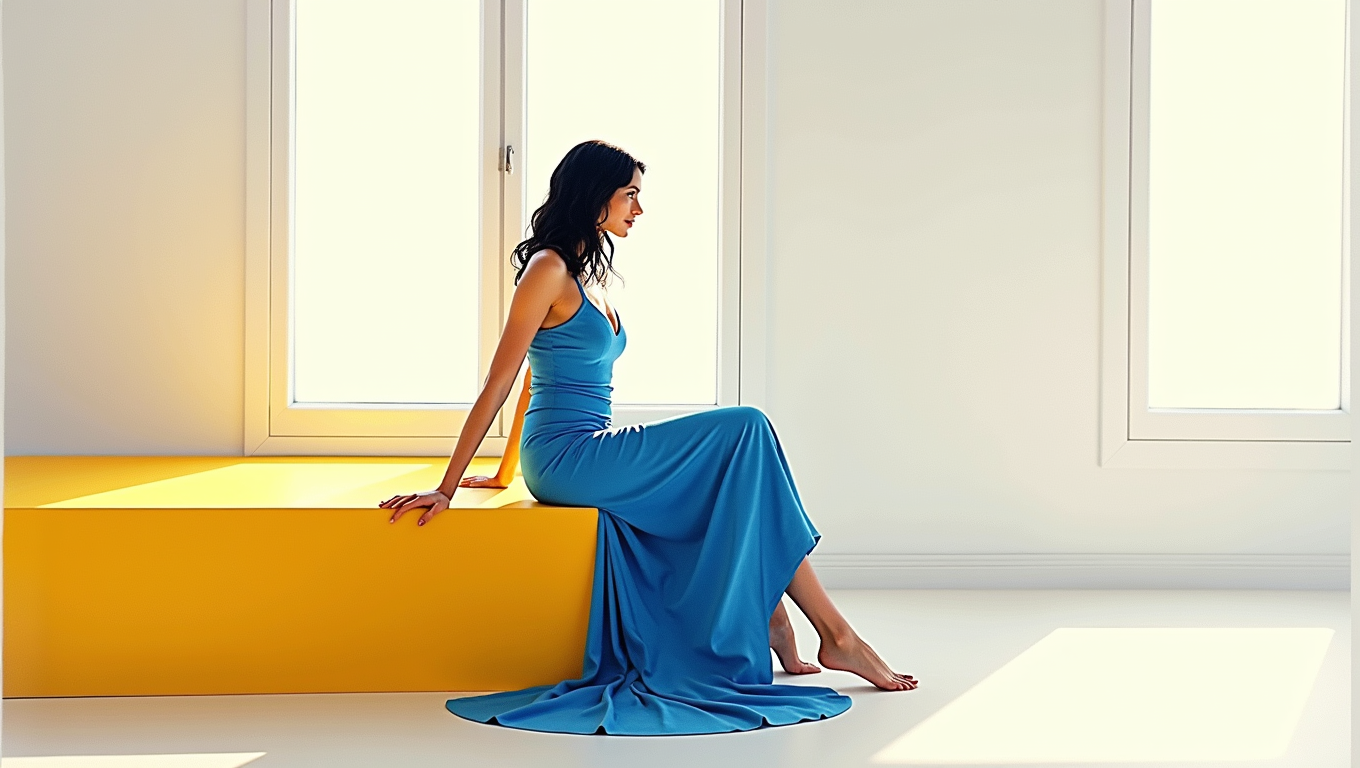

In [ ]:
Image(filename='image.png')

# Diversity is our strength

Sometimes. In well-defined and limited circumstances.

In [ ]:
# prepare the prompts
gender_list = ['woman', 'man']

origin_list = [ 'North European',  'Middle Eastern', 'South East Asian' ]

age_list = ['young', 'middle aged', 'elderly']

profession_list = [ 'doctor', 'athlete', 'singer']

style_list = ['realistic photograph', 'Rembrandt painting', 'minimalist graphic']

This code block initializes five distinct lists of strings. Each list contains descriptive terms that fall into a specific category. These lists are intended to be used as building blocks for programmatically constructing a variety of text prompts.

* `gender_list = ['woman', 'man']`: A list containing terms for gender.
* `origin_list = [ 'North European',  'Middle Eastern', 'South East Asian' ]`: A list specifying different geographical origins.
* `age_list = ['young', 'middle aged', 'elderly']`: A list of terms describing various age groups.
* `profession_list = [ 'doctor', 'athlete', 'singer']`: A list containing different professions.
* `style_list = ['realistic photograph', 'Rembrandt painting', 'minimalist graphic']`: A list describing different artistic styles for the generated image.

In [ ]:
totality =  [origin_list, age_list, gender_list, profession_list, style_list ]
combo = itertools.product(*totality)
combo_list = []
for f in combo:
    combo_list.append(f)

This code generates all possible combinations of the descriptive terms defined in the previous lists.

First, a new list called `totality` is created. This list contains the five previously defined lists (`origin_list`, `age_list`, `gender_list`, `profession_list`, and `style_list`) as its elements.

Next, the `itertools.product` function is used to compute the Cartesian product of these lists. The `*totality` syntax unpacks the `totality` list, providing each of the five inner lists as a separate argument to the function. `itertools.product` then creates an iterator that yields tuples, where each tuple is a unique combination formed by taking one item from each of the input lists. This iterator is assigned to the variable `combo`.


Finally, the code initializes an empty list `combo_list` and then iterates through the `combo` iterator. In each iteration, a single combination tuple (e.g., `('North European', 'young', 'woman', 'doctor', 'realistic photograph')`) is appended to `combo_list`. After the loop finishes, `combo_list` will contain every single possible combination of the elements from the original five lists.



In [ ]:
prompt_list = []
for (ii, xx) in enumerate(combo_list):
    prom = "Cinematic, full-body image of "  + xx[0] + " " + xx[1] + " " + xx[2] + " " + xx[3] + ", in the style of " + xx[4]
    prompt_list.append(prom)


This code block iterates through the list of combinations and assembles each one into a complete, well-structured text prompt.

First, an empty list named `prompt_list` is created to hold the resulting prompt strings.

```python
prompt_list = []
```

A `for` loop then processes each item in `combo_list`. The `enumerate` function provides both the index (`ii`) and the item itself (`xx`), where `xx` is a tuple containing a unique combination of descriptive terms (e.g., `('North European', 'young', 'woman', 'doctor', 'Rembrandt painting')`).

```python
for (ii, xx) in enumerate(combo_list):
```

Inside the loop, a formatted string `prom` is constructed for each combination tuple. It begins with the base phrase `"Cinematic, full-body image of "`. The first four elements of the tuple (`xx[0]` through `xx[3]`) are then added to describe the subject. The phrase `", in the style of "` is used to clearly introduce the fifth element (`xx[4]`), which defines the artistic style.

```python
    prom = "Cinematic, full-body image of "  + xx[0] + " " + xx[1] + " " + xx[2] + " " + xx[3] + ", in the style of " + xx[4]
```

Finally, each fully assembled prompt string `prom` is appended to the `prompt_list`. When the loop is complete, `prompt_list` will contain all the formatted prompts, ready for use in image generation.

```python
    prompt_list.append(prom)
```

In [ ]:
## subset to run faster
prompt_list = sample(prompt_list,20)

prompt_list

['Cinematic, full-body image of Middle Eastern elderly man doctor, in the style of Rembrandt painting',
 'Cinematic, full-body image of North European elderly woman doctor, in the style of Rembrandt painting',
 'Cinematic, full-body image of North European middle aged man doctor, in the style of realistic photograph',
 'Cinematic, full-body image of Middle Eastern elderly man singer, in the style of minimalist graphic',
 'Cinematic, full-body image of North European middle aged woman athlete, in the style of minimalist graphic',
 'Cinematic, full-body image of Middle Eastern middle aged man singer, in the style of minimalist graphic',
 'Cinematic, full-body image of Middle Eastern elderly woman doctor, in the style of minimalist graphic',
 'Cinematic, full-body image of North European elderly man singer, in the style of Rembrandt painting',
 'Cinematic, full-body image of North European elderly woman athlete, in the style of Rembrandt painting',
 'Cinematic, full-body image of Middle E

This code reduces the number of prompts in `prompt_list` to a smaller, random subset.

The comment `## subset to run faster` explains that the purpose of this operation is to decrease the number of prompts, which will speed up any subsequent processing that uses this list.

The line `prompt_list = sample(prompt_list,20)` uses the `sample` function from Python's `random` module. This function randomly selects 20 unique items from the existing `prompt_list`. The original `prompt_list` is then overwritten with this new, shorter list containing only the 20 randomly chosen prompts.

The final line, `prompt_list`, when executed in an interactive environment like a Jupyter Notebook, displays the contentsof the `prompt_list` variable. The output will be the list of the 20 randomly selected prompts.

In [ ]:
for (ii, prompt) in enumerate(prompt_list):

    for jj in range(CFG.howmany):
        image = pipe(prompt=prompt, num_inference_steps = CFG.infsteps, generator = g).images[0]
        imgname = "img_" + str(ii) + "x" + str(jj) + ".jpg"
        image = image.save(imgname)
        print(prompt)

  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of Middle Eastern elderly man doctor, in the style of Rembrandt painting


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of North European elderly woman doctor, in the style of Rembrandt painting


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of North European middle aged man doctor, in the style of realistic photograph


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of Middle Eastern elderly man singer, in the style of minimalist graphic


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of North European middle aged woman athlete, in the style of minimalist graphic


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of Middle Eastern middle aged man singer, in the style of minimalist graphic


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of Middle Eastern elderly woman doctor, in the style of minimalist graphic


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of North European elderly man singer, in the style of Rembrandt painting


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of North European elderly woman athlete, in the style of Rembrandt painting


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of Middle Eastern middle aged woman singer, in the style of minimalist graphic


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of Middle Eastern elderly man athlete, in the style of realistic photograph


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of Middle Eastern young man singer, in the style of realistic photograph


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of Middle Eastern middle aged man doctor, in the style of minimalist graphic


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of North European elderly woman athlete, in the style of minimalist graphic


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of North European young woman singer, in the style of Rembrandt painting


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of South East Asian middle aged man doctor, in the style of Rembrandt painting


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of South East Asian elderly man doctor, in the style of Rembrandt painting


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of North European young man doctor, in the style of Rembrandt painting


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of South East Asian middle aged man athlete, in the style of minimalist graphic


  0%|          | 0/30 [00:00<?, ?it/s]

Cinematic, full-body image of South East Asian middle aged man singer, in the style of realistic photograph


This code uses a nested loop structure to generate and save an image for each prompt in the `prompt_list`.

The outer loop, `for (ii, prompt) in enumerate(prompt_list):`, iterates through the list of prompts. The `enumerate` function provides both the index of the prompt (`ii`) and the prompt string itself (`prompt`).

Inside this loop, a nested inner loop, `for jj in range(CFG.howmany):`, runs for a number of times defined by `CFG.howmany`. Based on the earlier configuration where `CFG.howmany` was set to `1`, this inner loop will execute once for each prompt.

The following actions are performed within the inner loop:

* `image = pipe(prompt=prompt, num_inference_steps = CFG.infsteps, generator = g).images[0]`
    This line calls the image generation pipeline (`pipe`) with the current `prompt`. It specifies the number of inference steps from the configuration (`CFG.infsteps`) and provides the seeded random number generator `g` to ensure the results are reproducible. The `.images[0]` part extracts the generated image object.

* `imgname = "img_" + str(ii) + "x" + str(jj) + ".jpg"`
    A unique filename is constructed for the image. The name is composed of the prefix `"img_"`, the index of the prompt (`ii`), and the index of the image-per-prompt (`jj`). For example, the image for the first prompt will be named `"img_0x0.jpg"`.

* `image = image.save(imgname)`
    This command saves the generated `image` to the disk using the filename `imgname`. The file is saved in JPEG format. The `save` method's return value (`None`) is then assigned back to the `image` variable.

* `print(prompt)`
    The prompt that was just used to generate the image is printed to the console. This provides a running log of the script's progress.

In [ ]:
# list the available fileso
img_list = [f for f in os.listdir() if 'jpg' in f]
img_list

['img_4x0.jpg',
 'img_8x0.jpg',
 'img_7x0.jpg',
 'img_14x0.jpg',
 'img_9x0.jpg',
 'img_18x0.jpg',
 'img_13x0.jpg',
 'img_1x0.jpg',
 'img_0x0.jpg',
 'img_16x0.jpg',
 'img_5x0.jpg',
 'img_17x0.jpg',
 'img_19x0.jpg',
 'img_15x0.jpg',
 'img_3x0.jpg',
 'img_11x0.jpg',
 'img_10x0.jpg',
 'img_12x0.jpg',
 'img_2x0.jpg',
 'img_6x0.jpg']

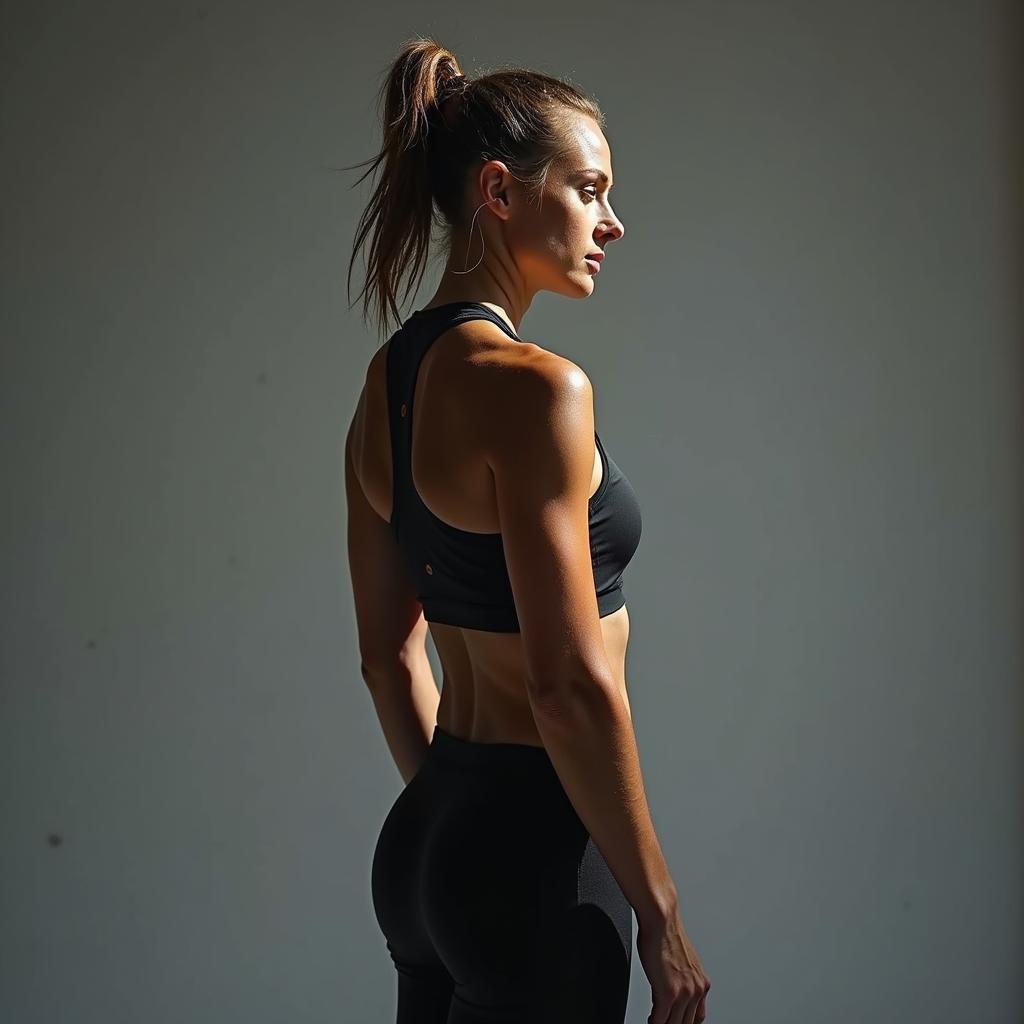

In [ ]:
Image(img_list[0])